In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("twitter_training.csv") 
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
df.columns = ["id", "topic", "sentiment", "text"]


In [4]:
df.isnull().sum()


id             0
topic          0
sentiment      0
text         686
dtype: int64

In [5]:
# remove NaN
df = df[df['text'].notna()]

# remove empty strings or spaces
df = df[df['text'].str.strip() != ""]

# reset index
df.reset_index(drop=True, inplace=True)

df.isnull().sum()


id           0
topic        0
sentiment    0
text         0
dtype: int64

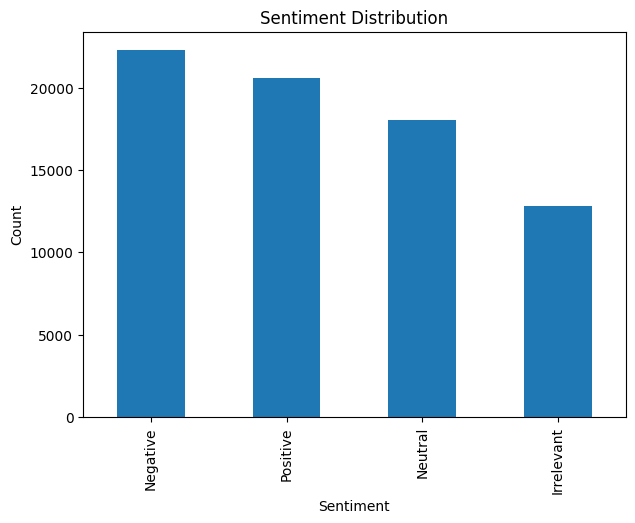

In [6]:
plt.figure(figsize=(7,5))
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

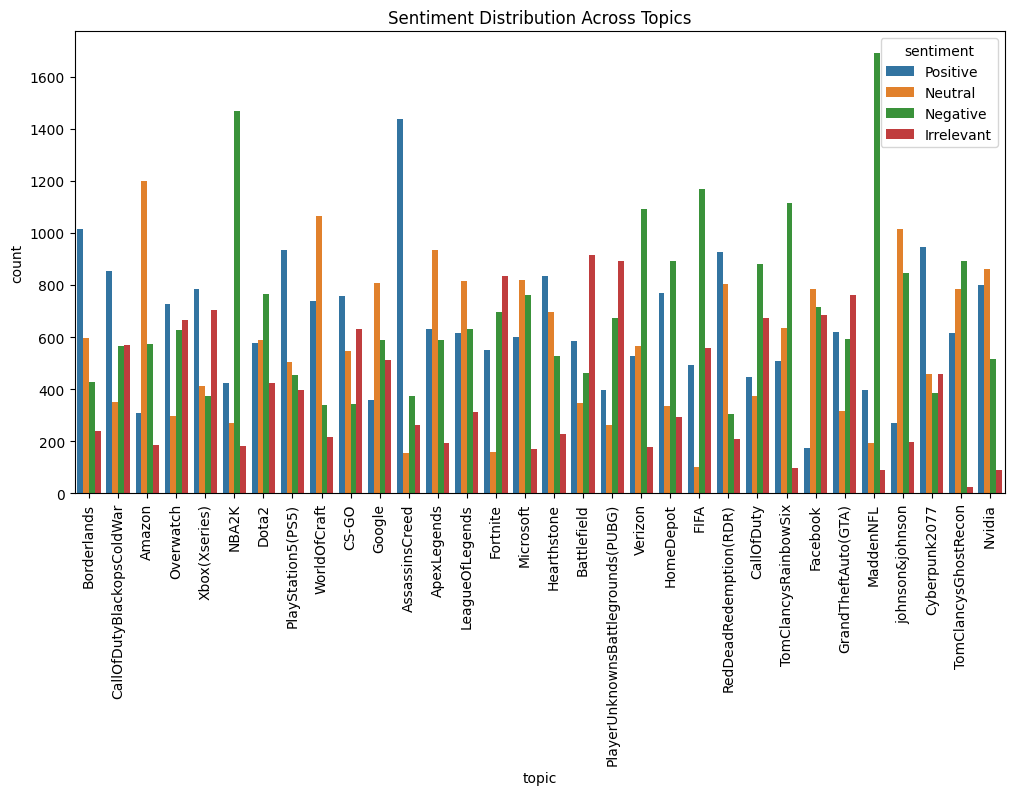

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="topic", hue="sentiment")
plt.xticks(rotation=90)
plt.title("Sentiment Distribution Across Topics")
plt.show()


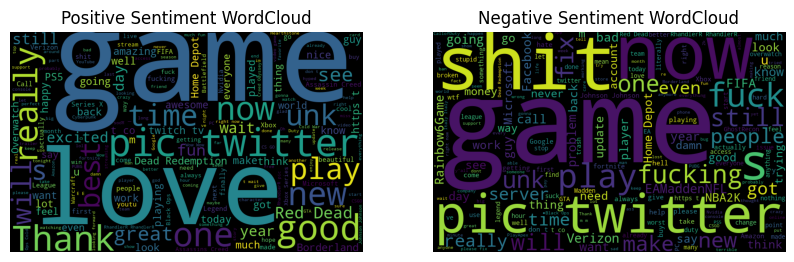

In [9]:
from wordcloud import WordCloud

positive_text = " ".join(df[df['sentiment']=="Positive"]["text"])
negative_text = " ".join(df[df['sentiment']=="Negative"]["text"])

wc_pos = WordCloud(width=800, height=500).generate(positive_text)
wc_neg = WordCloud(width=800, height=500).generate(negative_text)

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(wc_pos)
plt.axis("off")
plt.title("Positive Sentiment WordCloud")

plt.subplot(1,2,2)
plt.imshow(wc_neg)
plt.axis("off")
plt.title("Negative Sentiment WordCloud")

plt.show()
